# Statistical Analysis of Customer Ratings on Zomato



## Table of Contents
### 1. Problem Statement
### 2. Objective
### 3. Data Collection
### 4. Data Description
### 5. EDA
### 6. Data Preprocessing
### 7. Visualization
### 8. Feature Engineering
### 9. Data Splitting
### 10. Model Selection
### 11. Model Training & Evaluation
### 12. Feature Selection
### 13. Hyperparameter Tuning
### 14. Conclusion
### 15. Save the Model¶

## Problem Statement¶
#### Determine how price, location, votes, and cuisine type affect customer ratings on Zomato, to uncover key factors driving customer satisfaction and guide restaurant improvements.

## Objective
#### The analysis aims  to investigate the distribution of customer ratings on Zomato and determine the factors affecting these ratings. The study will focus on understanding how features such as price, location, number of votes, and cuisine type impact customer satisfaction.

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Data collection

In [3]:
# Load the dataset with a specified encoding
df = pd.read_csv("ZomatoData.csv", encoding='ISO-8859-1')

In [4]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [5]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:")
df.tail()

Last few rows of the dataset:


,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,Turkish Lira(TL),No,No,No,No,3,788,80,4.1
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",Turkish Lira(TL),No,No,No,No,3,1034,105,4.2
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",Turkish Lira(TL),No,No,No,No,4,661,170,3.7
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,Turkish Lira(TL),No,No,No,No,4,901,120,4.0
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,Turkish Lira(TL),No,No,No,No,2,591,55,4.0


## Data Description

In [6]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(df.shape)

Dataset size:
(9551, 19)


>The dataset contains 9551 rows and 19 columns.

## EDA (Exploratory Data Analysis)

In [7]:
# Display the columns of the dataset
columns = df.columns
print("Columns in the dataset:",columns)

Columns in the dataset: Index(['RestaurantID', 'RestaurantName', 'CountryCode', 'City', 'Address',
       'Locality', 'LocalityVerbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has_Table_booking', 'Has_Online_delivery',
       'Is_delivering_now', 'Switch_to_order_menu', 'Price_range', 'Votes',
       'Average_Cost_for_two', 'Rating'],
      dtype='object')


In [8]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['RestaurantID', 'CountryCode', 'Longitude', 'Latitude', 'Price_range',
       'Votes', 'Average_Cost_for_two', 'Rating'],
      dtype='object')


In [9]:
# Categorical columns
categorical_cols= df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['RestaurantName', 'City', 'Address', 'Locality', 'LocalityVerbose',
       'Cuisines', 'Currency', 'Has_Table_booking', 'Has_Online_delivery',
       'Is_delivering_now', 'Switch_to_order_menu'],
      dtype='object')


In [10]:
# Get a summary of the dataset
print("Summary of the dataset:")
df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RestaurantID          9551 non-null   int64  
 1   RestaurantName        9551 non-null   object 
 2   CountryCode           9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   LocalityVerbose       9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has_Table_booking     9551 non-null   object 
 12  Has_Online_delivery   9551 non-null   object 
 13  Is_delivering_now     9551 non-null   object 
 14  Switch_to_order_menu  9551 non-null   object 
 1

In [11]:
# Display statistical summary for all columns within the dataFram
df.describe(include='all')

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551.000000,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,12,2,2,2,1,NaN,NaN,NaN,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,NaN,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,8652,8393,7100,9517,9551,NaN,NaN,NaN,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,NaN,NaN,NaN,NaN,NaN,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,NaN,NaN,NaN,NaN,NaN,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,131.000000,700.000000,3.700000


In [12]:
# Describe the numerical features
print("Statistical description of numerical features:")
df.describe()

Statistical description of numerical features:


,RestaurantID,CountryCode,Longitude,Latitude,Price_range,Votes,Average_Cost_for_two,Rating
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,56.750546,41.467058,11.007935,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,1.000000,-157.948486,-41.330428,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,1.000000,77.191964,28.570469,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,1.000000,77.282006,28.642758,2.000000,131.000000,700.000000,3.700000
max,1.850065e+07,216.000000,174.832089,55.976980,4.000000,10934.000000,800000.000000,4.900000


In [13]:
# Describe the categorical features
print("Statistical description of categorical features:")
df[categorical_cols].describe()

Statistical description of categorical features:


,RestaurantName,City,Address,Locality,LocalityVerbose,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551


In [14]:
# Check for Null Values 
print("Checking for missing values:")
print(df.isnull().sum())



Checking for missing values:
RestaurantID            0
RestaurantName          0
CountryCode             0
City                    0
Address                 0
Locality                0
LocalityVerbose         0
Longitude               0
Latitude                0
Cuisines                9
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Votes                   0
Average_Cost_for_two    0
Rating                  0
dtype: int64


In [15]:
# Check for Null Duplicates
print("Checking for duplicate records:")
print(df.duplicated().sum())

Checking for duplicate records:
0


>The dataset contains no duplicates but has missing values in the 'cuisines' column, which will be addressed through imputation or other methods if needed. We will then focus on additional critical aspects of data preprocessing and analysis, such as handling unnecessary columns, detecting and treating outliers, and addressing skewness and kurtosis.

## Data Visualization

<Figure size 2000x1000 with 0 Axes>

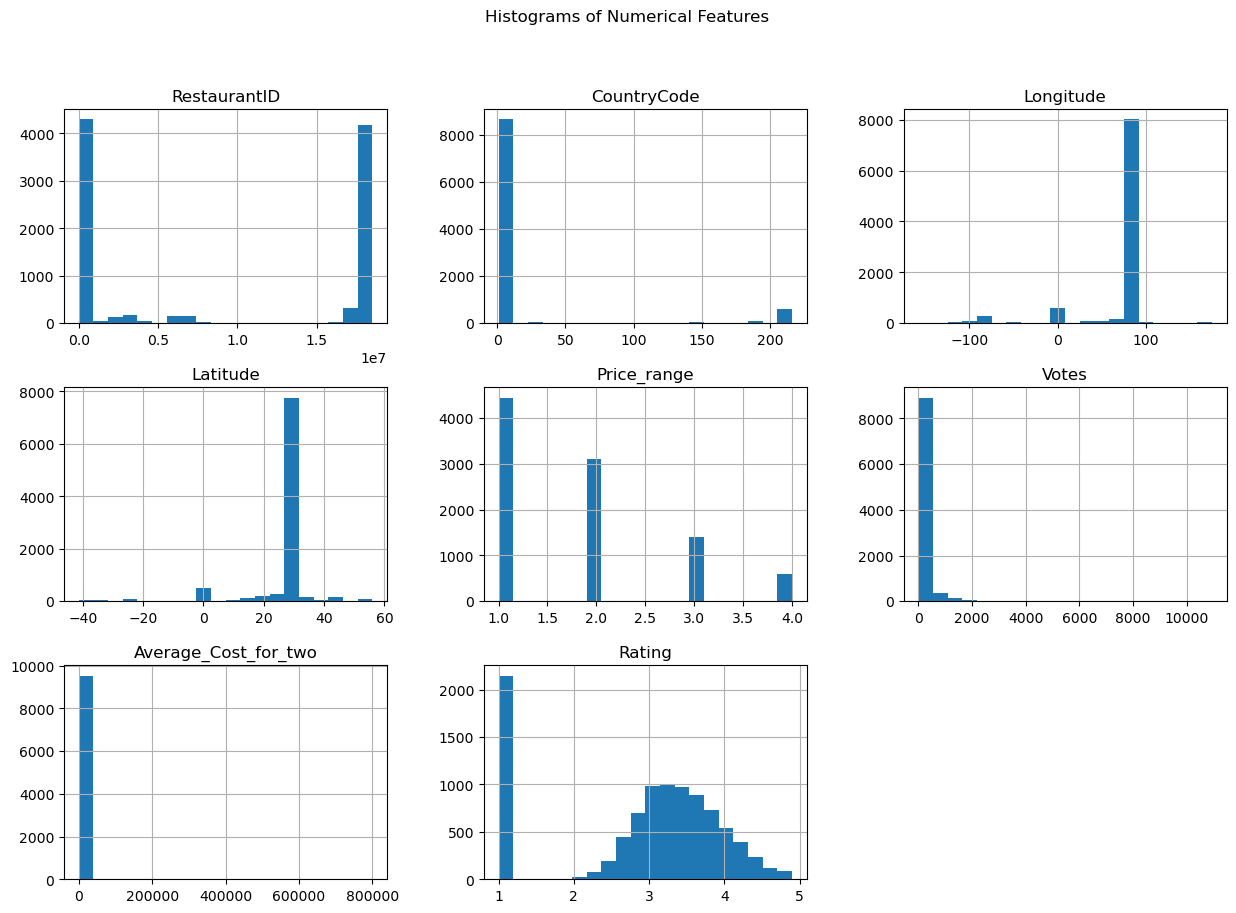

In [16]:
# Histograms for numerical features
plt.figure(figsize=(20, 10))
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

>Histograms are essential visual tools in data analysis for understanding how numerical data is distributed across different intervals or bins. They provide insights into the central tendency and spread of each feature, helping to identify patterns such as skewness

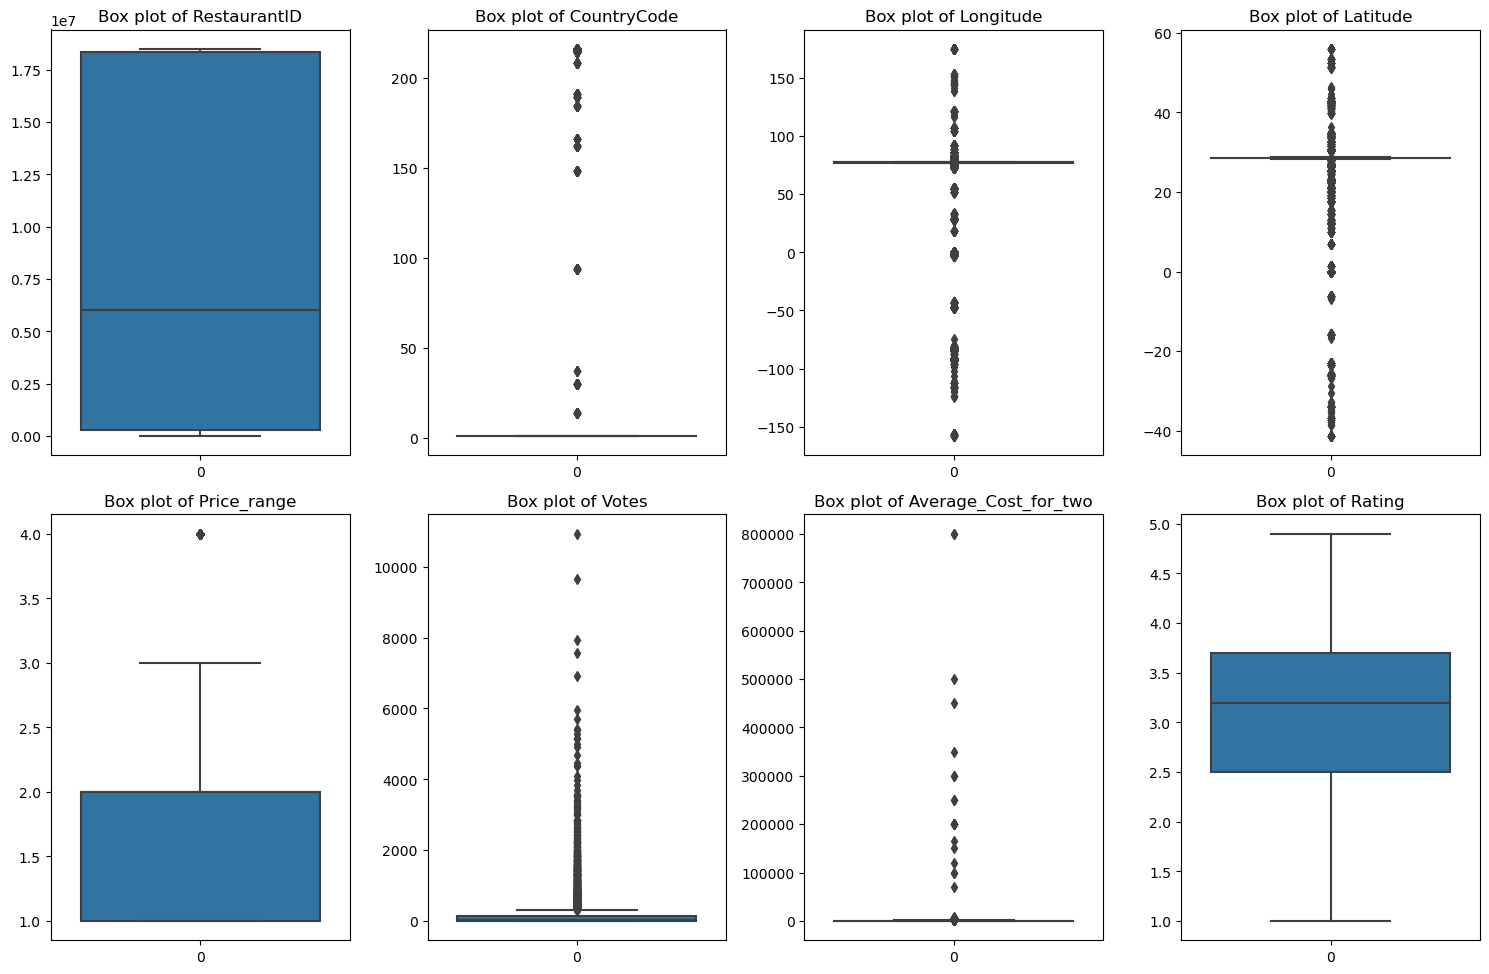

In [17]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

>Box plots are essential for visualizing the distribution and variability of numerical data in the dataset. They clearly show the median, interquartile range (IQR), and potential outliers for each feature. Since the dataset contains outliers, we will address these using appropriate methods to ensure accurate analysis.

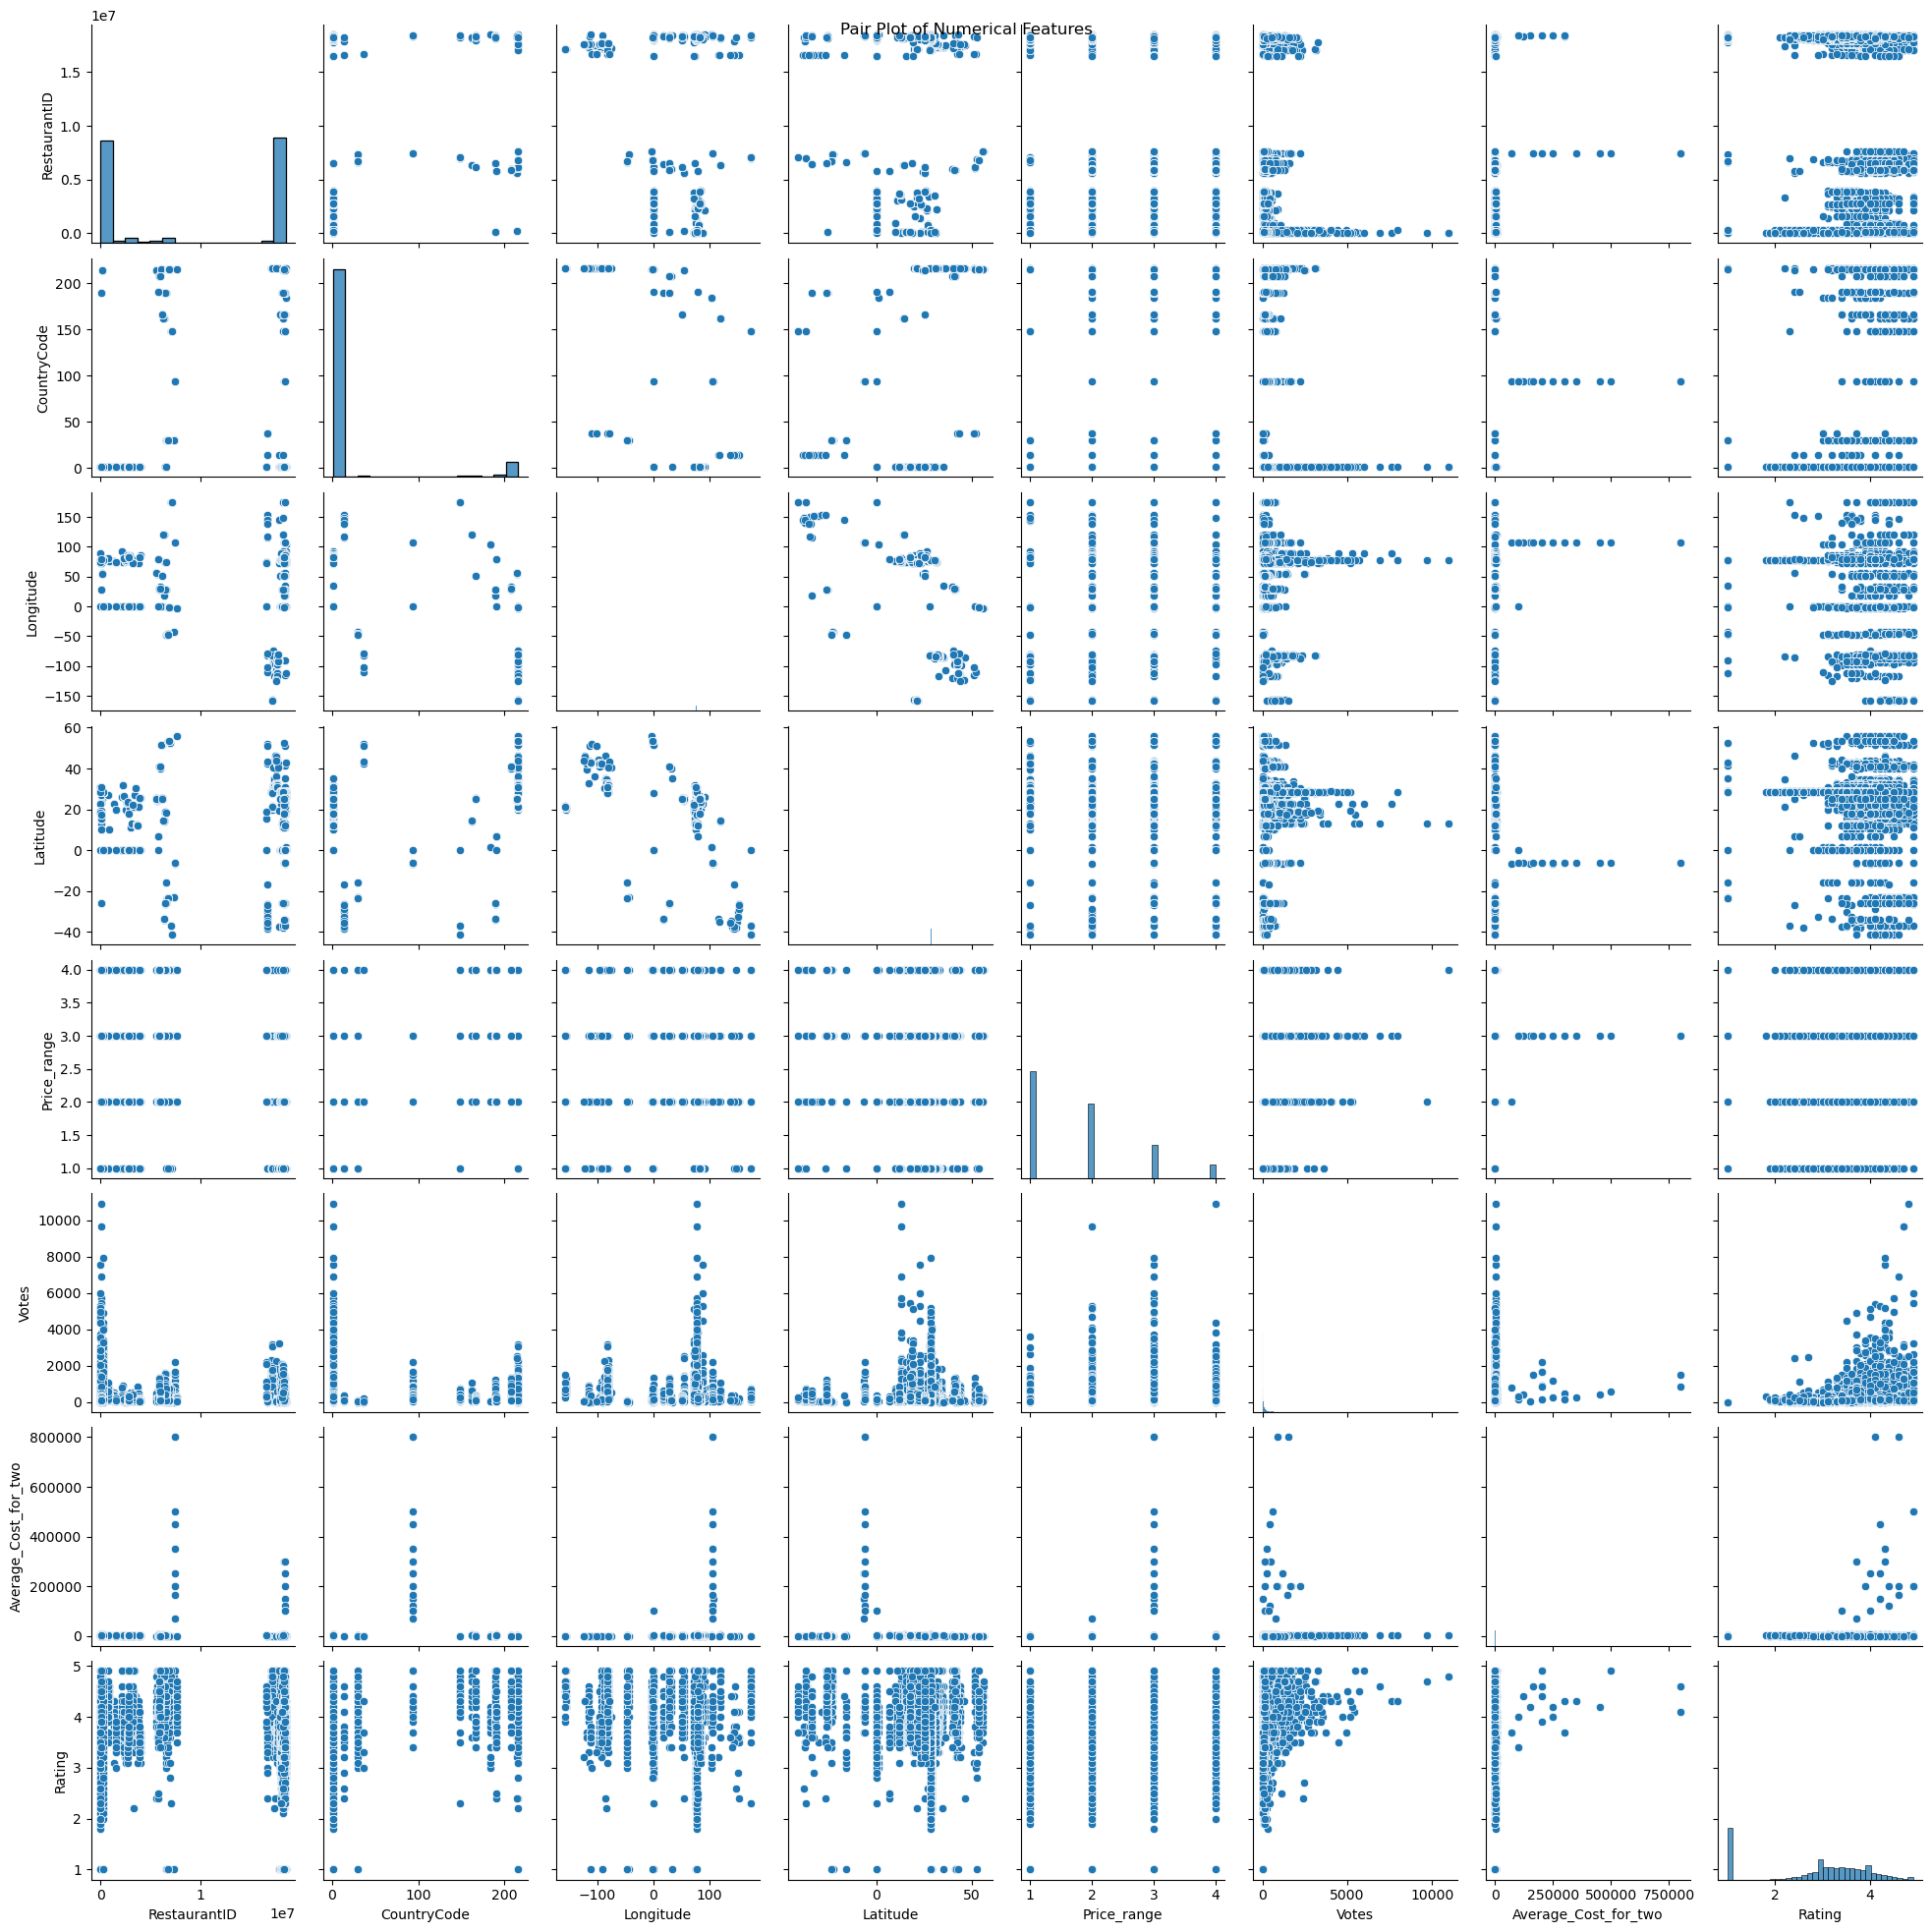

In [18]:
# Scatter plot matrix
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

>Pair plots are used to visualize pairwise relationships between numerical variables in a dataset. They help identify patterns, trends, and potential correlations between variables,, providing valuable insights for further exploration and analysis.

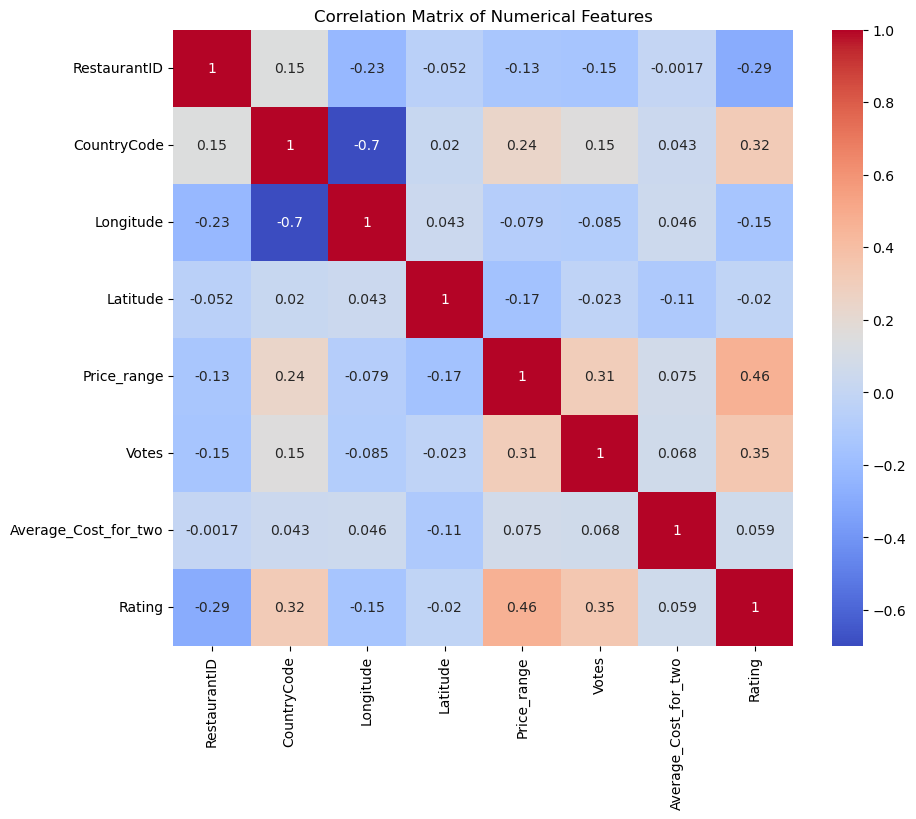

In [19]:
# Correlation matrix
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

>The correlation matrix visually represents the relationships between numerical features in a dataset. Each cell in the matrix shows the correlation coefficient between two variables, with values ranging from -1 to 1. A high positive correlation (close to 1) indicates that the variables move together in the same direction, while a high negative correlation (close to -1) indicates they move in opposite directions. A value near 0 suggests no linear relationship.

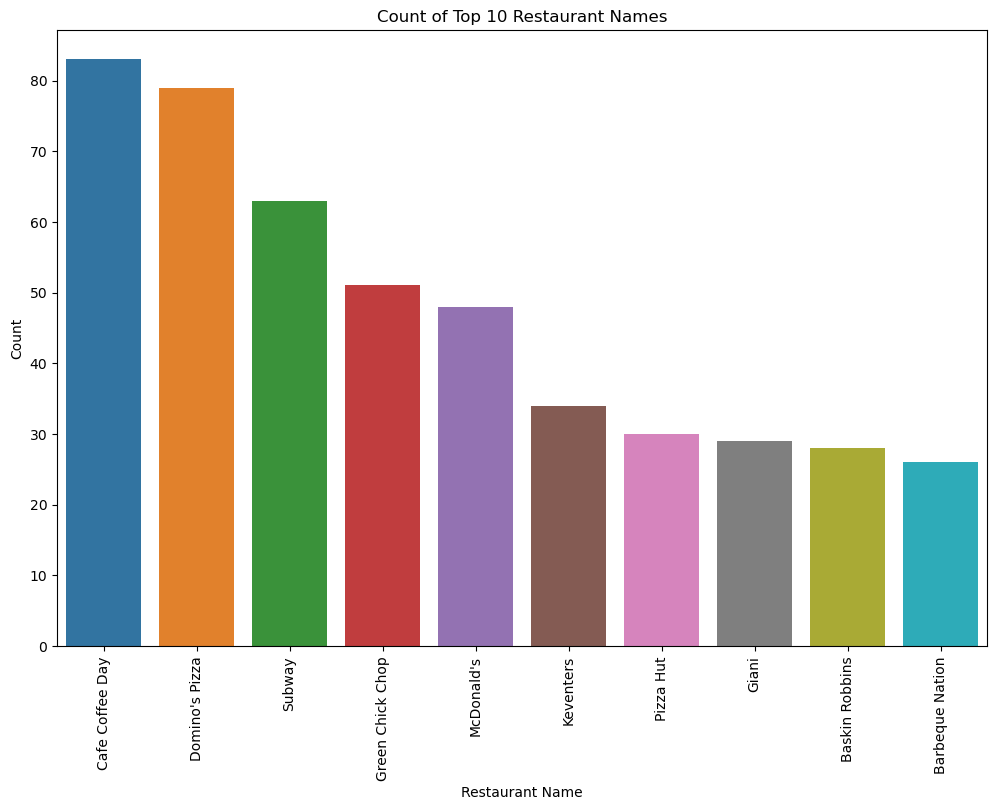

In [20]:
# Get the top 10 restaurant names by count
top_restaurants = df['RestaurantName'].value_counts().nlargest(10).index
top_restaurants_df = df[df['RestaurantName'].isin(top_restaurants)]

# Count Plot of Top 10 Restaurant Names
plt.figure(figsize=(12, 8))
sns.countplot(data=top_restaurants_df, x='RestaurantName', order=top_restaurants)
plt.xticks(rotation=90)
plt.title('Count of Top 10 Restaurant Names')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.show()

>Cafe Coffee Day appears as the most frequently listed restaurant, followed by Domino's Pizza.  Understanding the prominence of these restaurants can provide insights into their market presence and potential customer preferences.

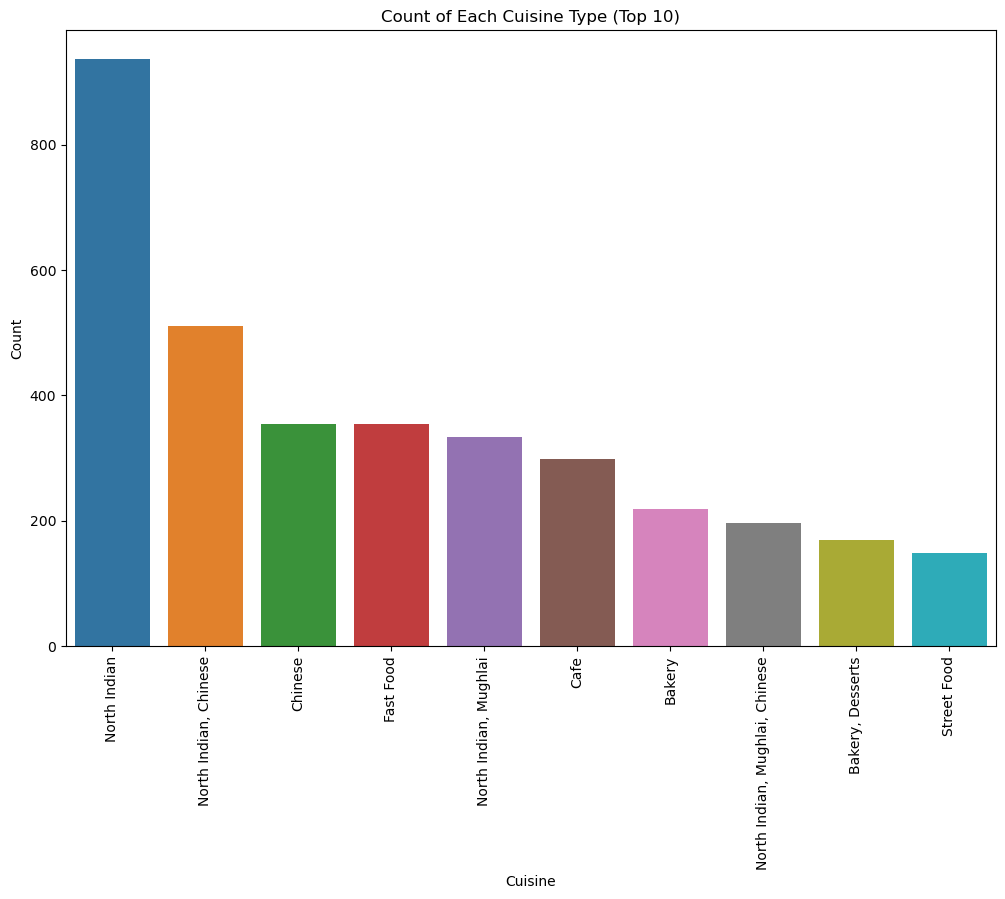

In [21]:
# Get the top 10 cuisine types by count
top_cuisines = df['Cuisines'].value_counts().nlargest(10).index
top_cuisines_df = df[df['Cuisines'].isin(top_cuisines)]

# Count Plot of Top 10 Cuisine Types
plt.figure(figsize=(12, 8))
sns.countplot(data=top_cuisines_df, x='Cuisines', order=top_cuisines)
plt.xticks(rotation=90)
plt.title('Count of Each Cuisine Type (Top 10)')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

>Popular cuisines indicate prevalent dining preferences and market trends, reflecting the most common food choices and offering insights into customer tastes.









>providing insights into overall customer satisfaction and the frequency of different rating levels.The majority of ratings fall into the '3-4' category, indicating a general level of moderate customer satisfaction.

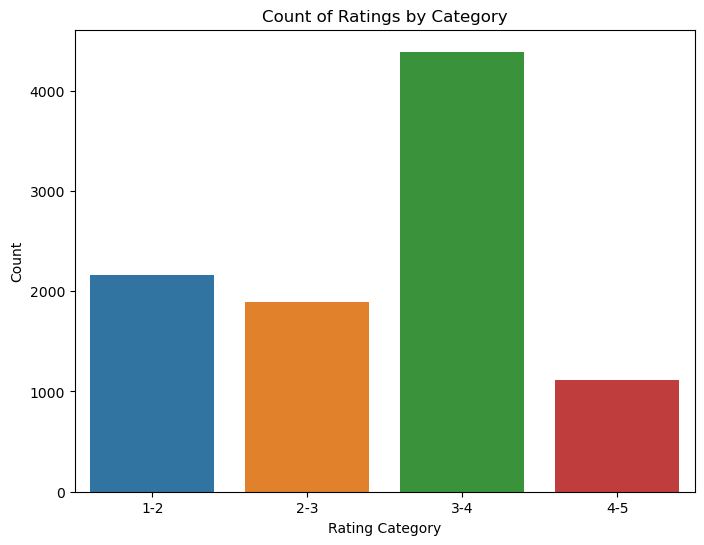

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create the count plot directly without adding a new column
plt.figure(figsize=(8, 6))

# Use pd.cut() directly in the plotting code
rating_categories = pd.cut(df['Rating'], bins=[0, 2, 3, 4, 5], labels=['1-2', '2-3', '3-4', '4-5'])

sns.countplot(x=rating_categories)
plt.title('Count of Ratings by Category')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.show()


## Data Preprocessing

### Handling Missing Values:

In [23]:
# Find the mode of the 'Cuisines' column
mode_cuisines = df['Cuisines'].mode()[0]

# Replace missing values in 'Cuisines' with the mode
df['Cuisines'].fillna(mode_cuisines, inplace=True)

# Verify that there are no more missing values
print("Checking for missing values after imputation:")
print(df.isnull().sum())

Checking for missing values after imputation:
RestaurantID            0
RestaurantName          0
CountryCode             0
City                    0
Address                 0
Locality                0
LocalityVerbose         0
Longitude               0
Latitude                0
Cuisines                0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Votes                   0
Average_Cost_for_two    0
Rating                  0
dtype: int64


>Missing values in the 'Cuisines' column were addressed by imputing with the mode, ensuring a complete dataset for accurate analysis of cuisine types.

### Dealing with Duplicate Data

>After checking for duplicate records in the dataset, it has been confirmed that there are no duplicate entries:

## Skewness & Kurtosis

In [24]:

# Calculate skewness and kurtosis
skewness = df[numerical_cols].skew()

print(skewness)

#Identify positive and negative skewness (absolute value>1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('variable with positive skewness (skew > 1):\n', positive_skewness)
print('variable with negative skewness (skew < -1):\n', negative_skewness)



RestaurantID             0.061570
CountryCode              3.043965
Longitude               -2.807328
Latitude                -3.081635
Price_range              0.889618
Votes                    8.807637
Average_Cost_for_two    35.477915
Rating                  -0.677423
dtype: float64
variable with positive skewness (skew > 1):
 CountryCode              3.043965
Votes                    8.807637
Average_Cost_for_two    35.477915
dtype: float64
variable with negative skewness (skew < -1):
 Longitude   -2.807328
Latitude    -3.081635
dtype: float64


In [25]:
kurtosis = df[numerical_cols].kurt()
print(kurtosis)

# Identify the platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions


platykurtic = kurtosis[kurtosis < 3]
leptokurtic = kurtosis[kurtosis > 3]

print('variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic) 

RestaurantID              -1.950996
CountryCode                7.392578
Longitude                  8.216586
Latitude                  12.530803
Price_range               -0.142550
Votes                    128.225969
Average_Cost_for_two    1495.777394
Rating                    -0.762189
dtype: float64
variables with platykurtic distribution (kurtosis < 3):
 RestaurantID   -1.950996
Price_range    -0.142550
Rating         -0.762189
dtype: float64
variables with leptokurtic distribution (kurtosis > 3):
 CountryCode                7.392578
Longitude                  8.216586
Latitude                  12.530803
Votes                    128.225969
Average_Cost_for_two    1495.777394
dtype: float64


In [26]:
import numpy as np

# Apply log transformation to skewed data, excluding the 'Rating' column
for col in numerical_cols:
    if col != 'Rating':  # Exclude 'Rating' column
        if np.abs(df[col].skew()) > 0.5:
            df[col] = np.log1p(df[col])  # Apply log transformation

# Verify the transformation by checking skewness after log transformation
print(df[numerical_cols].skew())

RestaurantID            0.061570
CountryCode             2.865895
Longitude              -3.698508
Latitude               -3.658551
Price_range             0.496214
Votes                  -0.029507
Average_Cost_for_two   -0.611041
Rating                 -0.677423
dtype: float64


In [27]:
# Verify skewness is addressed
print("\nSkewness after transformation:")
for col in numerical_cols:
    print(f"{col}: {df[col].skew()}")


Skewness after transformation:
RestaurantID: 0.061569976479250714
CountryCode: 2.86589531121641
Longitude: -3.6985083193022192
Latitude: -3.658551194267658
Price_range: 0.49621352208363434
Votes: -0.029507427046757732
Average_Cost_for_two: -0.6110411414184691
Rating: -0.6774227413472484


In [28]:
# Verify skewness is addressed
print("\nSkewness after transformation:")
for col in numerical_cols:
    print(f"{col}: {df[col].kurt()}")


Skewness after transformation:
RestaurantID: -1.9509964359301797
CountryCode: 6.310196054143813
Longitude: 11.924782055488379
Latitude: 11.981782646084527
Price_range: -1.0110475886092478
Votes: -0.8389133572406688
Average_Cost_for_two: 5.199875412019385
Rating: -0.7621888463167119


In [29]:
# Check for Null Values 
print("Checking for missing values:")
print(df.isnull().sum())



Checking for missing values:
RestaurantID              0
RestaurantName            0
CountryCode               0
City                      0
Address                   0
Locality                  0
LocalityVerbose           0
Longitude               558
Latitude                203
Cuisines                  0
Currency                  0
Has_Table_booking         0
Has_Online_delivery       0
Is_delivering_now         0
Switch_to_order_menu      0
Price_range               0
Votes                     0
Average_Cost_for_two      0
Rating                    0
dtype: int64


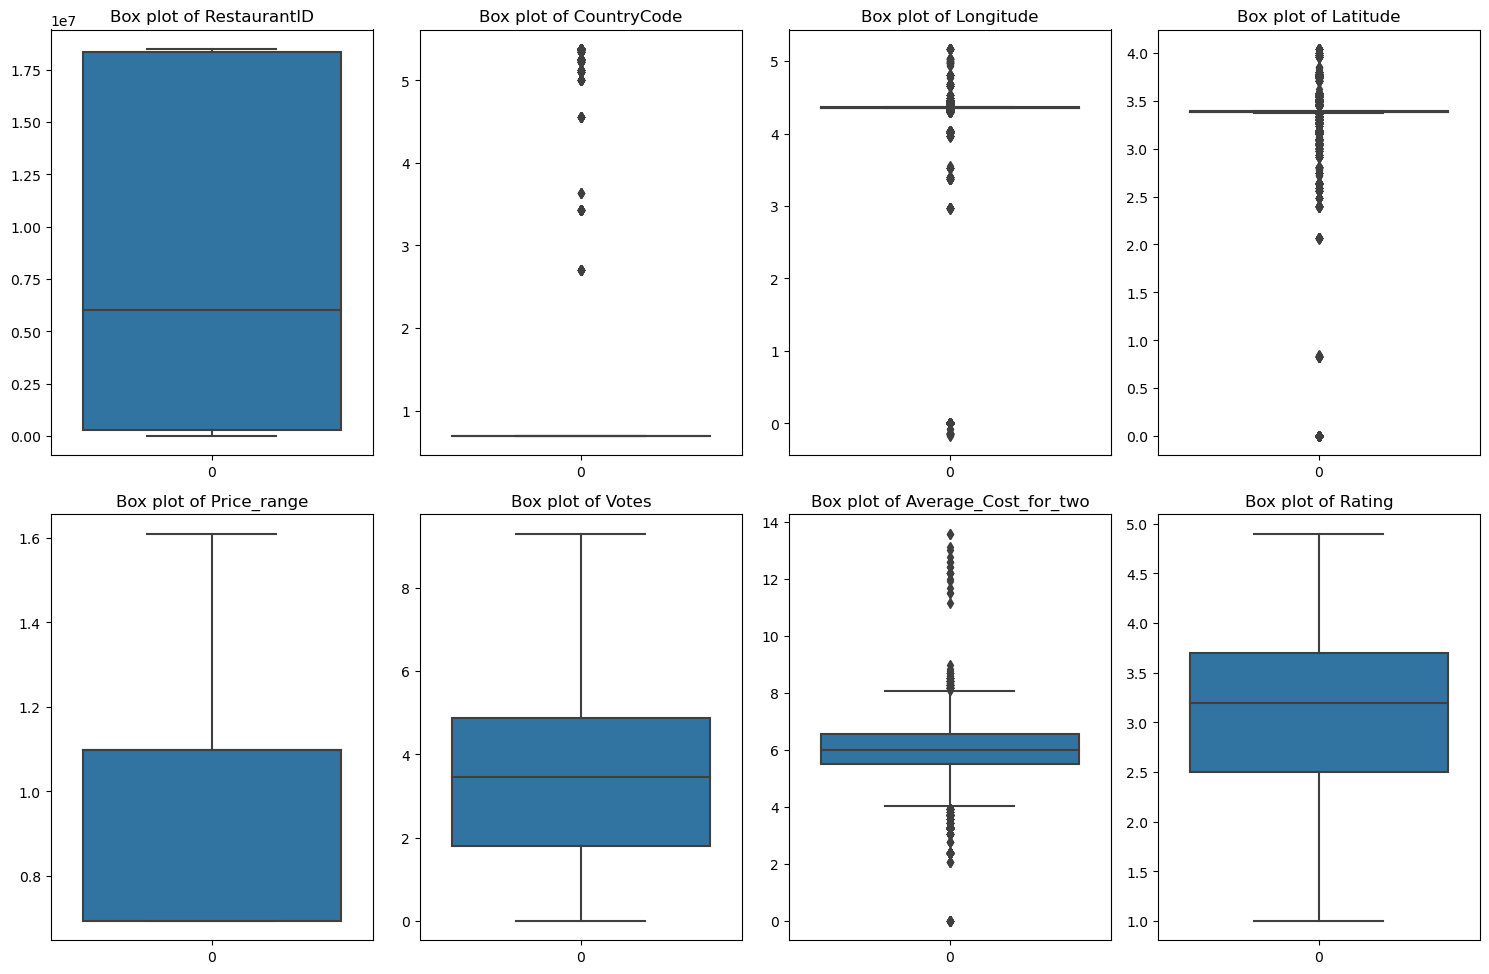

In [30]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

## Outlier Detection and Treatment:

In [31]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [32]:
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

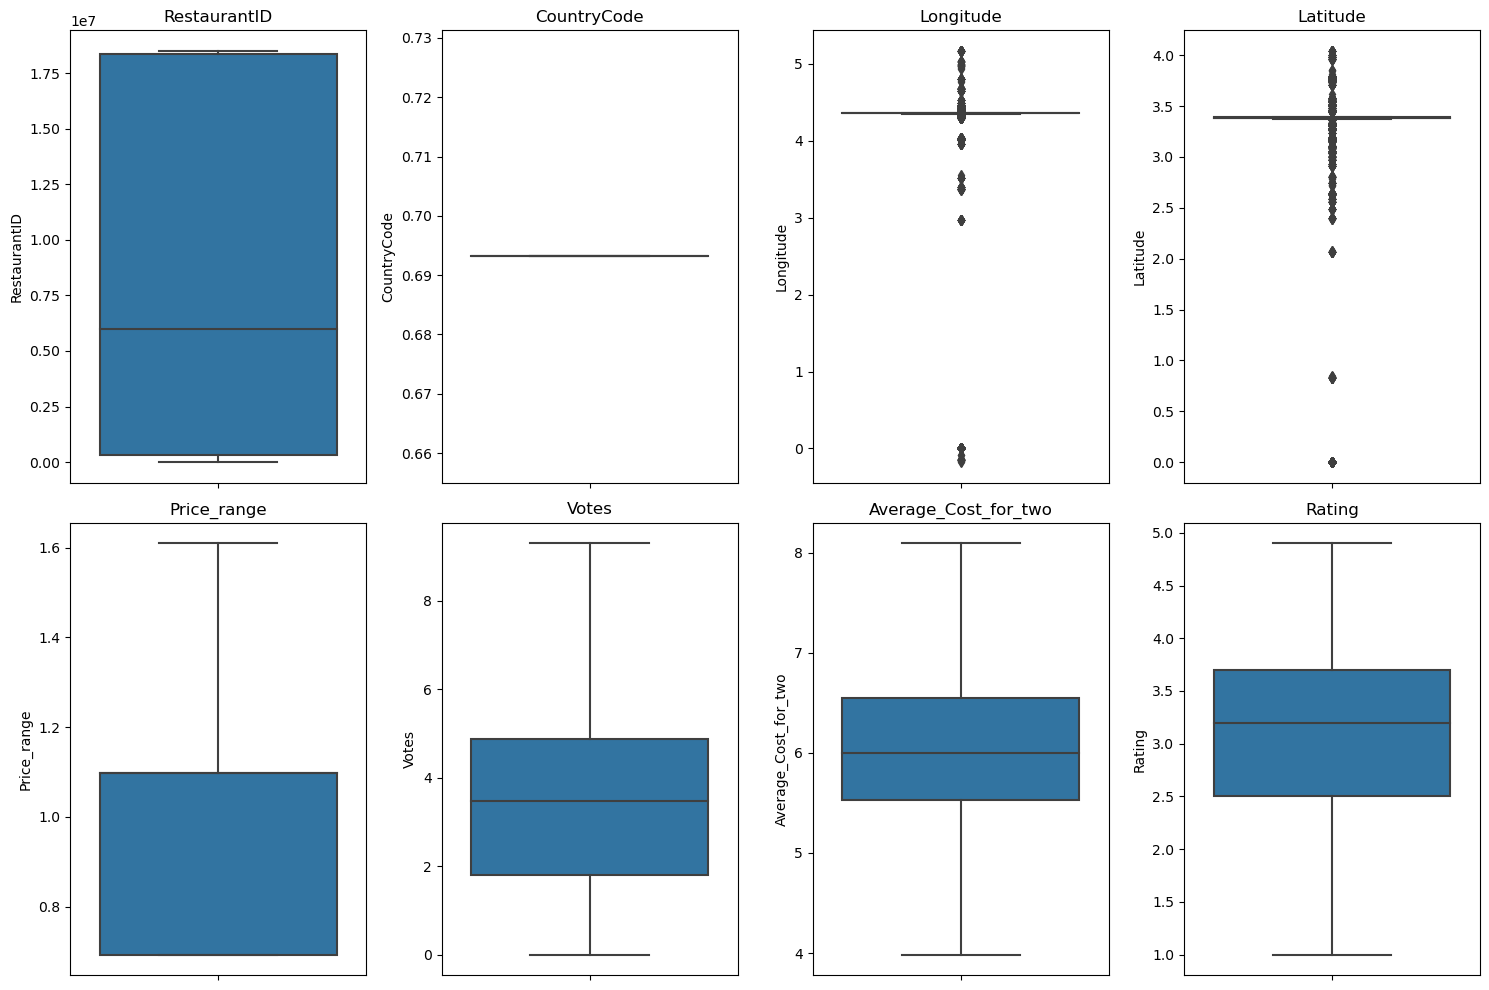

In [33]:

#box plot to identify outliers
plt.figure(figsize=(15, 10))
numeric_columns = df.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Remove unnecessary columns

In [34]:
df = df.drop(['Longitude', 'Latitude','CountryCode'], axis=1)

>Removing Longitude and Latitude Due to Outliers

The features Longitude and Latitude represent geographical coordinates and have an indirect effect on dining preferences by capturing location-based factors. However, in this dataset, these features contain numerous outliers, which can distort analysis and affect the performance of predictive models. Since their contribution is indirect and outliers can introduce noise, we are removing these features to improve the dataset’s quality and model reliability, focusing on more relevant factors for predicting dining behaviors.

>Removing CountryCode Due to Minimal Impact

The feature CountryCode represents the country of the restaurant or user, but it has minimal direct impact on dining preferences or behavior in this analysis. While it may provide some context on the geographical location, other features like city or locality already capture location-based variations. Since CountryCode does not add significant predictive power for understanding individual eating habits or restaurant choices








In [35]:
df = df.drop([ 'Switch_to_order_menu'], axis=1)


>Removing Switch_to_order_menu Due to Single Value:

The Switch_to_order_menu feature contains only a single unique value across all records, which means it does not provide any meaningful variation or impact on the analysis, including the prediction of ratings.

### Saving the Cleaned Dataset¶

In [36]:
# Save the cleaned dataset for further steps
df.to_csv('cleaned_dataset.csv', index=False)

## Loading the Cleaned Dataset

In [37]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,RestaurantID,RestaurantName,City,Address,Locality,LocalityVerbose,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Votes,Average_Cost_for_two,Rating
0,6317637.0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,1.386294,5.752573,7.003974,4.8
1,6304287.0,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,1.386294,6.383507,7.090910,4.5
2,6300002.0,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,1.609438,5.602119,8.093090,4.4
3,6318506.0,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",Botswana Pula(P),No,No,No,1.609438,5.902633,7.313887,4.9
4,6314302.0,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",Botswana Pula(P),Yes,No,No,1.609438,5.438079,7.313887,4.8


In [38]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(df.shape)

Dataset size:
(9551, 15)


>The cleaned dataset consists of 9551 rows and 16 columns

## Visualization

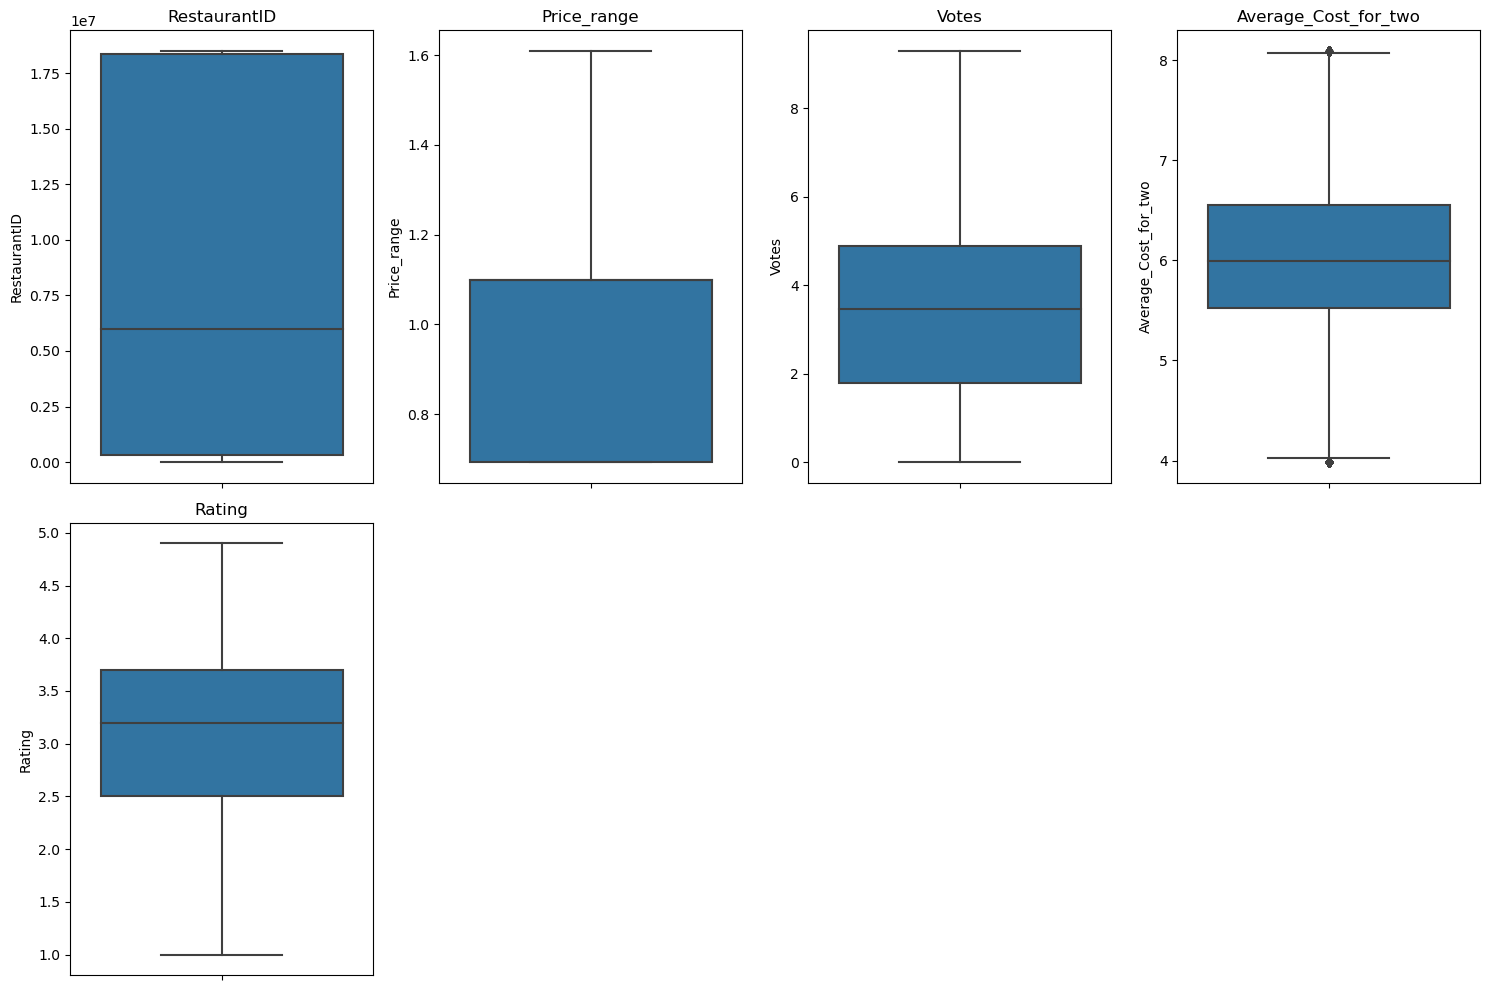

In [39]:

#box plot to identify outliers
plt.figure(figsize=(15, 10))
numeric_columns = df.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

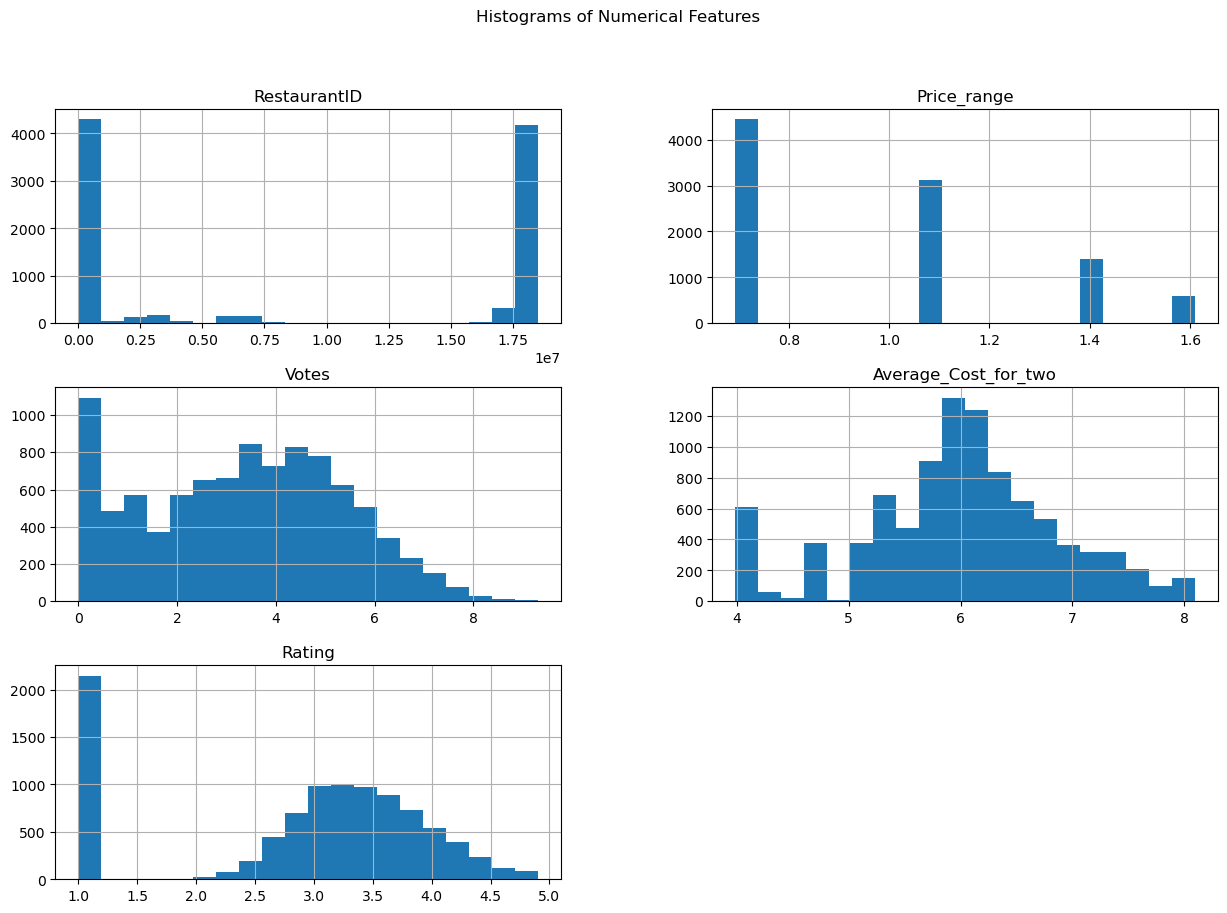

In [40]:
# Histograms for numerical features
plt.figure(figsize=(20, 10))
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

## Feature Engineering

### Label Encoding

In [41]:

# Import the LabelEncoder class from the preprocessing module of scikit-learn
from sklearn.preprocessing import LabelEncoder


categorical_columns = df.select_dtypes(include='object').columns

# Encode categorical features 
for feature in categorical_columns:
    label_encoder  = LabelEncoder()
    df[feature] =label_encoder .fit_transform(df[feature])
df    

,RestaurantID,RestaurantName,City,Address,Locality,LocalityVerbose,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Votes,Average_Cost_for_two,Rating
0,6317637.0,3749,73,8685,171,172,920,0,1,0,0,1.386294,5.752573,7.003974,4.8
1,6304287.0,3173,73,6055,593,601,1111,0,1,0,0,1.386294,6.383507,7.090910,4.5
2,6300002.0,2897,75,4684,308,314,1671,0,1,0,0,1.609438,5.602119,8.093090,4.4
3,6318506.0,4707,75,8690,862,875,1126,0,0,0,0,1.609438,5.902633,7.313887,4.9
4,6314302.0,5523,75,8689,862,875,1122,0,1,0,0,1.609438,5.438079,7.313887,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730.0,4443,140,5926,517,523,1813,11,0,0,0,1.386294,6.670766,4.394449,4.1
9547,5908749.0,1311,140,5962,552,558,1824,11,0,0,0,1.386294,6.942157,4.663439,4.2
9548,5915807.0,3069,140,5966,554,561,1110,11,0,0,0,1.609438,6.495266,5.141664,3.7
9549,5916112.0,513,140,5967,554,561,1657,11,0,0,0,1.609438,6.804615,4.795791,4.0


### Feature Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
columns=[ 'RestaurantID', 'RestaurantName', 'City','Address' ,
       'Locality',  'Cuisines',
       'Currency', 'Has_Table_booking', 'Has_Online_delivery',
       'Is_delivering_now', 'Price_range', 'Votes',
       'Average_Cost_for_two']

# Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[columns])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=columns)

df[columns] = scaled_df
df

,RestaurantID,RestaurantName,City,Address,Locality,LocalityVerbose,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Votes,Average_Cost_for_two,Rating
0,0.341480,0.503559,0.521429,0.973982,0.141674,172,0.504386,0.0,1.0,0.0,0.0,0.756471,0.618575,0.734893,4.8
1,0.340758,0.426192,0.521429,0.679040,0.491301,601,0.609101,0.0,1.0,0.0,0.0,0.756471,0.686419,0.756055,4.5
2,0.340527,0.389120,0.535714,0.525289,0.255178,314,0.916118,0.0,1.0,0.0,0.0,1.000000,0.602396,1.000000,4.4
3,0.341527,0.632236,0.535714,0.974543,0.714167,875,0.617325,0.0,0.0,0.0,0.0,1.000000,0.634711,0.810331,4.9
4,0.341300,0.741840,0.535714,0.974431,0.714167,875,0.615132,0.0,1.0,0.0,0.0,1.000000,0.584757,0.810331,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0.319756,0.596776,1.000000,0.664573,0.428335,523,0.993969,1.0,0.0,0.0,0.0,0.756471,0.717308,0.099697,4.1
9547,0.319379,0.176091,1.000000,0.668611,0.457332,558,1.000000,1.0,0.0,0.0,0.0,0.756471,0.746491,0.165173,4.2
9548,0.319760,0.412223,1.000000,0.669059,0.458989,561,0.608553,1.0,0.0,0.0,0.0,1.000000,0.698436,0.281580,3.7
9549,0.319777,0.068905,1.000000,0.669171,0.458989,561,0.908443,1.0,0.0,0.0,0.0,1.000000,0.731701,0.197390,4.0


In [43]:
# Calculate the correlation matrix

correlation_matrix =df.corr()
correlation_matrix 

,RestaurantID,RestaurantName,City,Address,Locality,LocalityVerbose,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Votes,Average_Cost_for_two,Rating
RestaurantID,1.000000,0.003999,-0.005844,0.080615,0.069511,0.070102,-0.078644,-0.121472,-0.110071,-0.085089,0.012548,-0.134857,-0.391012,-0.205931,-0.290381
RestaurantName,0.003999,1.000000,-0.001399,0.000763,0.004322,0.004281,0.051679,0.009669,0.041173,0.028082,0.011984,0.061868,0.039536,0.037721,0.029093
City,-0.005844,-0.001399,1.000000,-0.019763,0.096444,0.093142,0.026614,-0.071996,-0.003762,0.012723,-0.014039,-0.112922,-0.129607,0.021314,-0.146097
Address,0.080615,0.000763,-0.019763,1.000000,0.159555,0.160495,0.023944,0.069499,0.006428,0.029874,0.031267,-0.045918,-0.187270,0.132120,-0.153291
Locality,0.069511,0.004322,0.096444,0.159555,1.000000,0.999465,0.006993,0.023723,-0.065594,-0.030993,-0.007299,-0.117699,-0.204772,-0.007033,-0.183614
LocalityVerbose,0.070102,0.004281,0.093142,0.160495,0.999465,1.000000,0.005960,0.022966,-0.065132,-0.031766,-0.007353,-0.115625,-0.203154,-0.007579,-0.182342
Cuisines,-0.078644,0.051679,0.026614,0.023944,0.006993,0.005960,1.000000,0.068912,0.050639,-0.016639,0.007773,-0.002887,-0.065528,0.082433,-0.093286
Currency,-0.121472,0.009669,-0.071996,0.069499,0.023723,0.022966,0.068912,1.000000,0.000640,0.006991,0.001458,0.068464,-0.010853,0.157509,-0.006287
Has_Table_booking,-0.110071,0.041173,-0.003762,0.006428,-0.065594,-0.065132,0.050639,0.000640,1.000000,0.101224,-0.016816,0.485551,0.275402,0.486176,0.194573
Has_Online_delivery,-0.085089,0.028082,0.012723,0.029874,-0.030993,-0.031766,-0.016639,0.006991,0.101224,1.000000,0.101730,0.113102,0.285154,0.245079,0.206506


<Axes: >

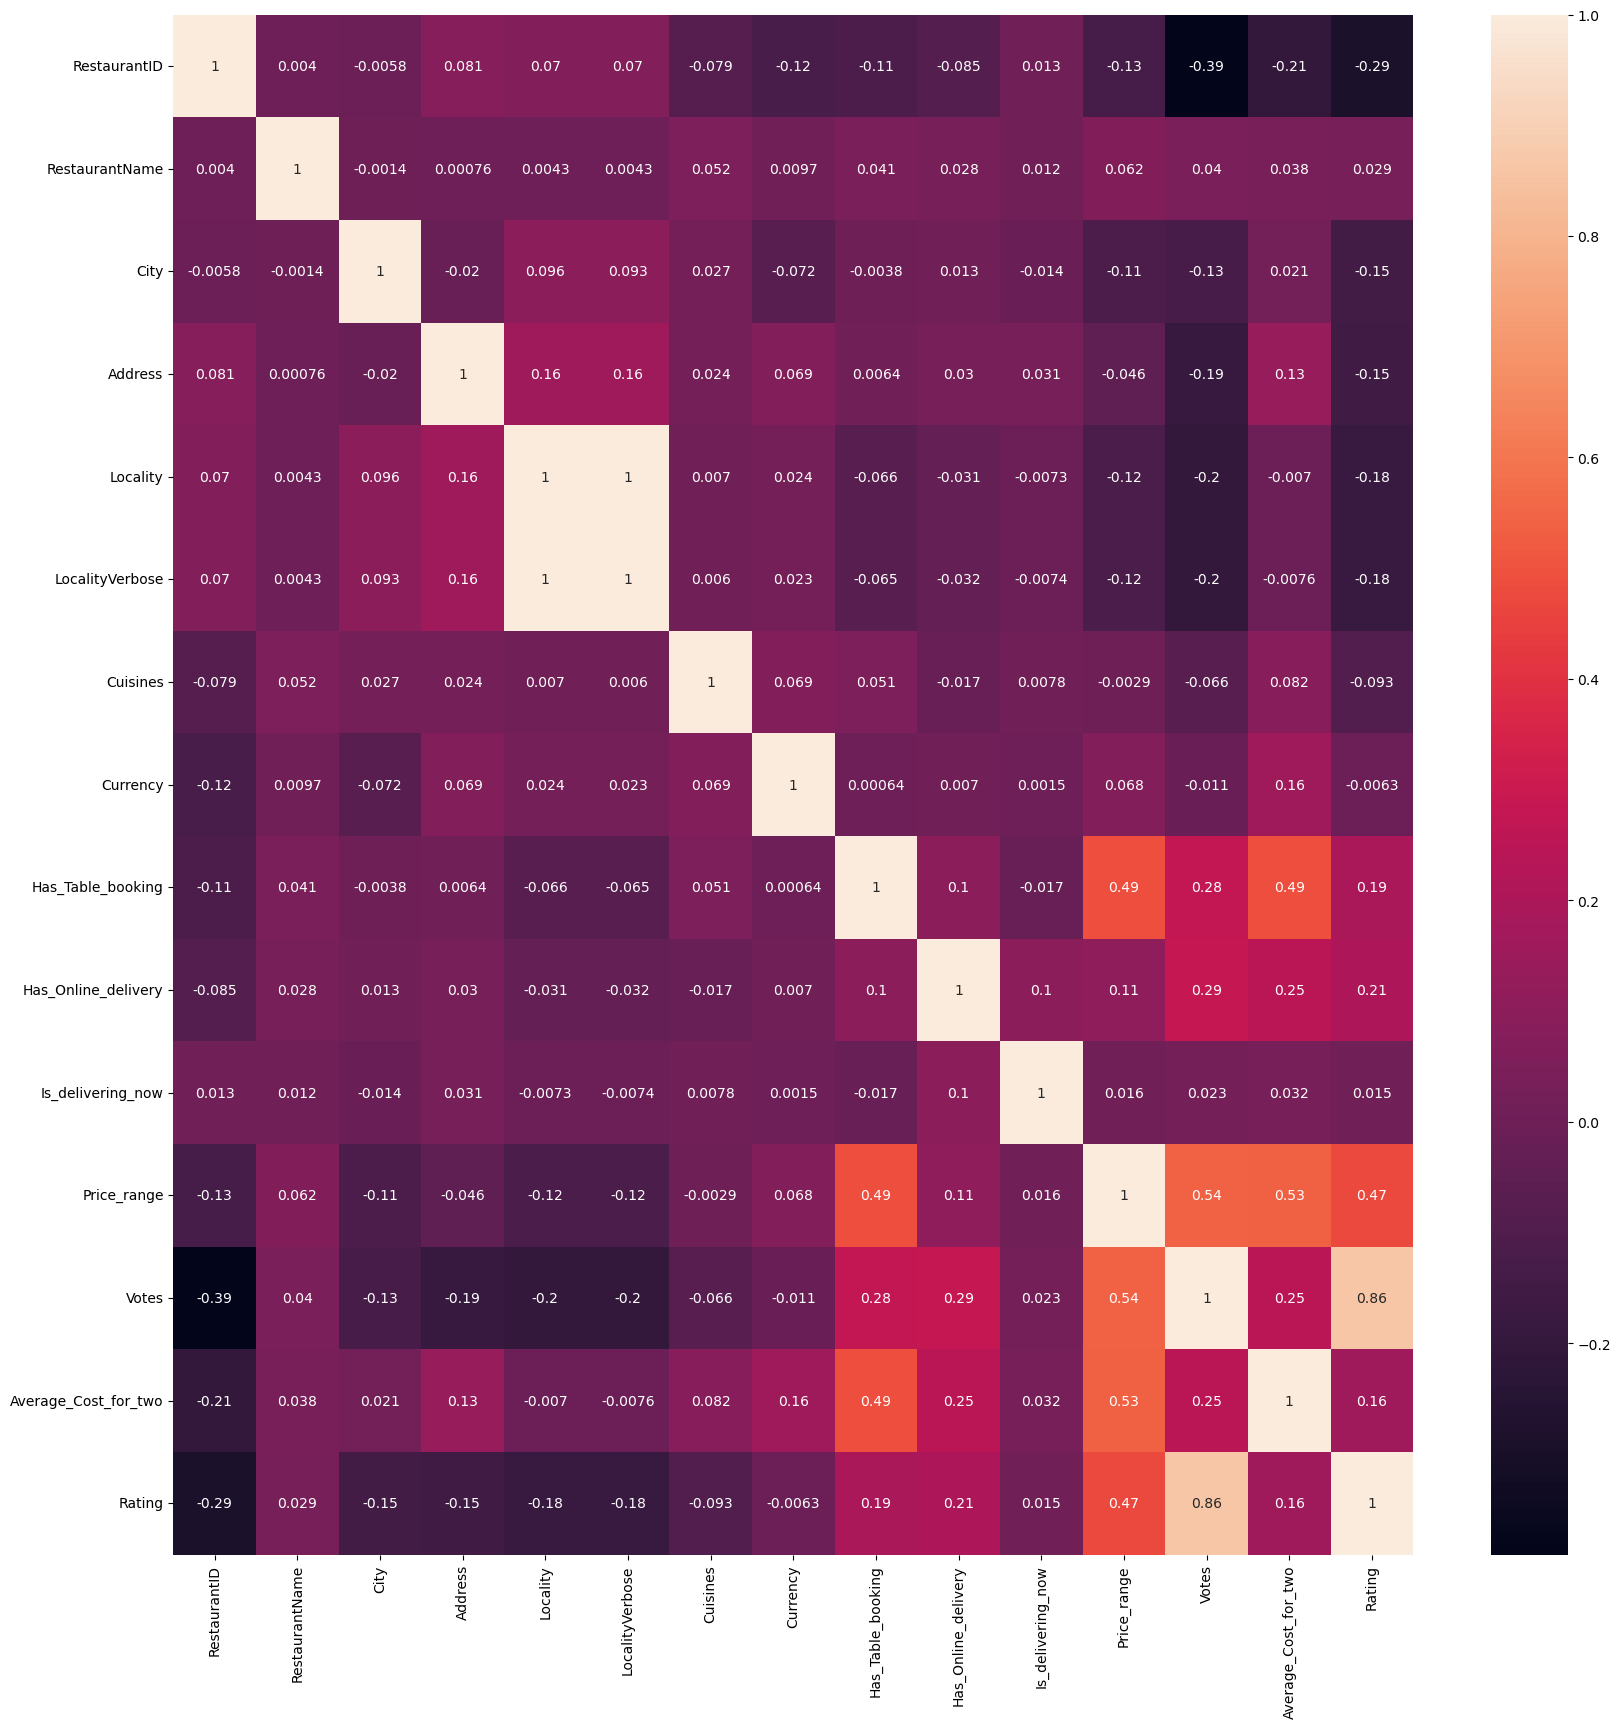

In [44]:
#Create a heatmap using seaborn's heatmap function
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True)

> Identified multicollinearity between Locality and LocalityVerbose, and decided to remove LocalityVerbose

In [45]:
df = df.drop(columns=['LocalityVerbose'])

In [46]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(df.shape)

Dataset size:
(9551, 14)


## Data Splitting

In [47]:
# Split dataset into features and target variable
x =df.drop('Rating', axis=1)
y =df['Rating']

In [48]:
#Input features
x

,RestaurantID,RestaurantName,City,Address,Locality,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Votes,Average_Cost_for_two
0,0.341480,0.503559,0.521429,0.973982,0.141674,0.504386,0.0,1.0,0.0,0.0,0.756471,0.618575,0.734893
1,0.340758,0.426192,0.521429,0.679040,0.491301,0.609101,0.0,1.0,0.0,0.0,0.756471,0.686419,0.756055
2,0.340527,0.389120,0.535714,0.525289,0.255178,0.916118,0.0,1.0,0.0,0.0,1.000000,0.602396,1.000000
3,0.341527,0.632236,0.535714,0.974543,0.714167,0.617325,0.0,0.0,0.0,0.0,1.000000,0.634711,0.810331
4,0.341300,0.741840,0.535714,0.974431,0.714167,0.615132,0.0,1.0,0.0,0.0,1.000000,0.584757,0.810331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0.319756,0.596776,1.000000,0.664573,0.428335,0.993969,1.0,0.0,0.0,0.0,0.756471,0.717308,0.099697
9547,0.319379,0.176091,1.000000,0.668611,0.457332,1.000000,1.0,0.0,0.0,0.0,0.756471,0.746491,0.165173
9548,0.319760,0.412223,1.000000,0.669059,0.458989,0.608553,1.0,0.0,0.0,0.0,1.000000,0.698436,0.281580
9549,0.319777,0.068905,1.000000,0.669171,0.458989,0.908443,1.0,0.0,0.0,0.0,1.000000,0.731701,0.197390


In [49]:
# Target variable
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Rating, Length: 9551, dtype: float64

In [50]:
# Splitting the dataset into 70-30 that is , 70% of the data is for training and 30% of the data is for testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

##  Model Selection, Model Training

### Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R^2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression
Mean Squared Error: 0.3277665187090391
R^2 Score: 0.7390797561479282


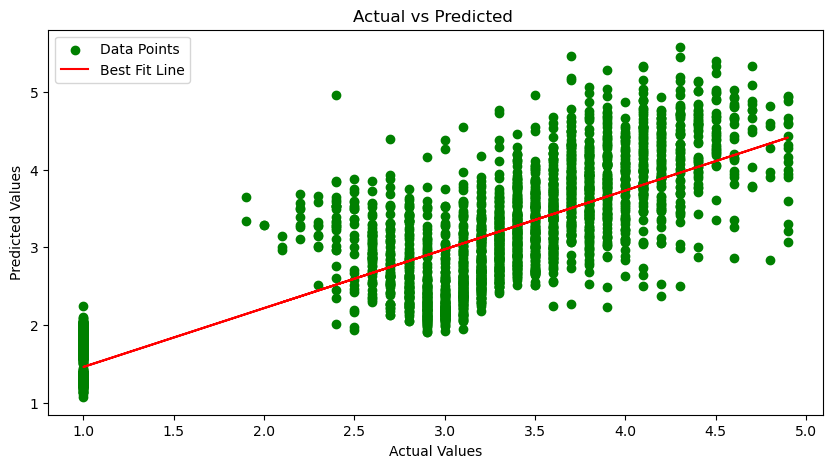

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_test' is the actual values and 'y_pred_gbr' is the predicted values
plt.figure(figsize=(10, 5))

# Scatter plot for testing data (Actual vs Predicted)
plt.scatter(y_test,y_pred_lr, color='green', label='Data Points')

# Plot best fit line
# Use polyfit to fit a line (degree 1 for linear)
m, b = np.polyfit(y_test,y_pred_lr, 1)

# Plot the line using the slope (m) and intercept (b)
plt.plot(y_test, m*y_test + b, color='red', label='Best Fit Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted ')
plt.legend()

plt.show()












### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

print("Decision Tree")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R^2 Score:", r2_score(y_test, y_pred_dt))

Decision Tree
Mean Squared Error: 0.13111304954640612
R^2 Score: 0.895626774221544


### Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Random Forest")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score:", r2_score(y_test, y_pred_rf))

Random Forest
Mean Squared Error: 0.076461629448709
R^2 Score: 0.9391323217525033


### Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)

print("Gradient Boosting")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("R^2 Score:", r2_score(y_test, y_pred_gb))

Gradient Boosting
Mean Squared Error: 0.07639982712307457
R^2 Score: 0.9391815198156205


### Support Vector Regression

In [56]:
from sklearn.svm import SVR

# Support Vector Regression
svr = SVR()
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

print("Support Vector Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("R^2 Score:", r2_score(y_test, y_pred_svr))

Support Vector Regression
Mean Squared Error: 0.19967501471013255
R^2 Score: 0.8410476648605383


### Finding the feature importance using Gradient Boosting model

In [57]:
# Extract feature importances
feature_importances = gb.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Print feature importances
print("Feature Importances:")
for idx in sorted_indices:
    print(f"{x.columns[idx]}: {feature_importances[idx]}")

Feature Importances:
Votes: 0.9503480270666088
RestaurantID: 0.029802491484969145
Average_Cost_for_two: 0.004064918931392254
Currency: 0.0040268024208397375
Cuisines: 0.003510517962623893
Price_range: 0.002377339797070105
City: 0.002305417512964726
Has_Online_delivery: 0.0014728166279930476
Locality: 0.0008886503312325319
RestaurantName: 0.0006215064304932375
Address: 0.0004839792630055935
Is_delivering_now: 5.134370685296631e-05
Has_Table_booking: 4.6188463953955304e-05


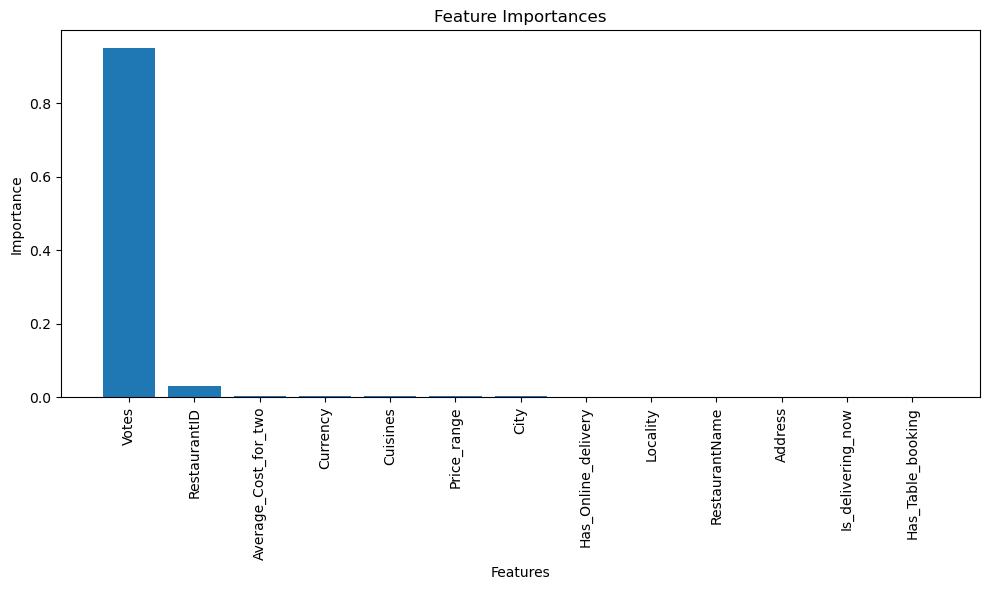

In [58]:
import matplotlib.pyplot as plt

# Assuming you have a trained Gradient Boosting model named GB_model
feature_importances = gb.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = [x.columns[idx] for idx in sorted_indices]
sorted_importances = [feature_importances[idx] for idx in sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


## Feature Selection

### 1.Train the models with selected features using SelectKBest

In [59]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import numpy as np

# Assume x_train and y_train are your training data
# x_train should be a pandas DataFrame containing your features
# y_train should be a pandas Series containing your target variable

# Initialize SelectKBest with f_classif scoring function and select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)

# Fit selector to training data and transform X to select the top k features
x_selected = selector.fit_transform(x_train, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features from the original DataFrame
selected_features = np.array(x.columns)[selected_indices]

# Print the names of the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['RestaurantID' 'City' 'Address' 'Locality' 'Cuisines' 'Has_Table_booking'
 'Has_Online_delivery' 'Price_range' 'Votes' 'Average_Cost_for_two']


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB  # Naive Bayes isn't typically used for regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

# Corrected code with commas separating the column names
x1 = df[['RestaurantID', 'City', 'Locality',
         'Has_Table_booking', 'Has_Online_delivery', 'Price_range', 'Votes',
         'Average_Cost_for_two']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=42)

# Initialize the regressors
regressors = [
    LinearRegression(),
    SVR(),
    DecisionTreeRegressor(),
    MLPRegressor(max_iter=1000),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor()
]

# Lists to store evaluation metrics
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []

# Train and evaluate each model
for model in regressors:
    model.fit(x1_train, y1_train)
    y_pred = model.predict(x1_test)
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(mean_squared_error(y1_test, y_pred, squared=False))
    MSE.append(mean_squared_error(y1_test, y_pred))
    MAE.append(mean_absolute_error(y1_test, y_pred))
    R2_score.append(r2_score(y1_test, y_pred) * 100)

# Create DataFrame to display the metrics
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "RMSE": RMSE,
    "MSE": MSE,
    "MAE": MAE,
    "R2_Score": R2_score
})

# Set the index to 'Model-Name' and sort by 'R2_Score'
models_df = models_df.set_index('Model-Name')
models_df = models_df.sort_values("R2_Score", ascending=False)

models_df


,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
RandomForestRegressor,0.284267,0.080807,0.186158,93.567279
GradientBoostingRegressor,0.284902,0.081169,0.191932,93.538487
AdaBoostRegressor,0.347315,0.120628,0.243850,90.397384
MLPRegressor,0.374328,0.140121,0.282983,88.845558
DecisionTreeRegressor,0.377754,0.142698,0.244121,88.640451
KNeighborsRegressor,0.410440,0.168461,0.268967,86.589597
SVR,0.439661,0.193302,0.326266,84.612095
LinearRegression,0.572892,0.328205,0.480305,73.873053


### 2.Recursive Feature Elimination (RFE) with Random Forest Regressor

In [61]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# RFE with Random Forest regressor
rfe_selector_regressor = RFE(estimator=rf_regressor, n_features_to_select=10, step=1)
x_rfe_regressor = rfe_selector_regressor.fit_transform(x_train, y_train)

# Get the selected feature indices
selected_indices_rfe_regressor = rfe_selector_regressor.get_support(indices=True)

# Get the names of the selected features
selected_features_rfe_regressor = x_train.columns[selected_indices_rfe_regressor]


# Print the names of the selected features
print("Selected Features:")
print(selected_features_rfe_regressor)

Selected Features:
Index(['RestaurantID', 'RestaurantName', 'City', 'Address', 'Locality',
       'Cuisines', 'Currency', 'Has_Online_delivery', 'Votes',
       'Average_Cost_for_two'],
      dtype='object')


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB  # Naive Bayes isn't typically used for regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

# Corrected code with commas separating the column names
x1 = df[['RestaurantID', 'RestaurantName', 'City', 'Address', 'Locality',
       'Cuisines', 'Currency', 'Has_Online_delivery', 'Votes',
       'Average_Cost_for_two']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=42)

# Initialize the regressors
regressors = [
    LinearRegression(),
    SVR(),
    DecisionTreeRegressor(),
    MLPRegressor(max_iter=1000),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor()
]

# Lists to store evaluation metrics
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []

# Train and evaluate each model
for model in regressors:
    model.fit(x1_train, y1_train)
    y_pred = model.predict(x1_test)
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(mean_squared_error(y1_test, y_pred, squared=False))
    MSE.append(mean_squared_error(y1_test, y_pred))
    MAE.append(mean_absolute_error(y1_test, y_pred))
    R2_score.append(r2_score(y1_test, y_pred) * 100)

# Create DataFrame to display the metrics
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "RMSE": RMSE,
    "MSE": MSE,
    "MAE": MAE,
    "R2_Score": R2_score
})

# Set the index to 'Model-Name' and sort by 'R2_Score'
models_df = models_df.set_index('Model-Name')
models_df = models_df.sort_values("R2_Score", ascending=False)

models_df


,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
RandomForestRegressor,0.277477,0.076994,0.181914,93.870882
GradientBoostingRegressor,0.277585,0.077053,0.186378,93.866135
AdaBoostRegressor,0.355350,0.126274,0.250577,89.947899
DecisionTreeRegressor,0.371630,0.138109,0.241382,89.005772
MLPRegressor,0.385577,0.148670,0.289920,88.165060
SVR,0.443176,0.196405,0.328088,84.365101
KNeighborsRegressor,0.534485,0.285674,0.372854,77.258775
LinearRegression,0.574241,0.329753,0.480071,73.749865


### 3.SelectFromModel with Lasso (L1 Regularization)

In [63]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Lasso model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed

# SelectFromModel with Lasso
selector_lasso = SelectFromModel(lasso_model, max_features=10)
x_lasso = selector_lasso.fit_transform(x_train, y_train)

# Get the selected feature indices
selected_indices_lasso = selector_lasso.get_support(indices=True)

# Print selected feature names
selected_features_lasso = x_train.columns[selected_indices_lasso]
print("Selected features using SelectFromModel with Lasso:", selected_features_lasso)

Selected features using SelectFromModel with Lasso: Index(['Votes'], dtype='object')


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB  # Naive Bayes isn't typically used for regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

# Corrected code with commas separating the column names
x1 = df[['Votes']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=42)

# Initialize the regressors
regressors = [
    LinearRegression(),
    SVR(),
    DecisionTreeRegressor(),
    MLPRegressor(max_iter=1000),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor()
]

# Lists to store evaluation metrics
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []

# Train and evaluate each model
for model in regressors:
    model.fit(x1_train, y1_train)
    y_pred = model.predict(x1_test)
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(mean_squared_error(y1_test, y_pred, squared=False))
    MSE.append(mean_squared_error(y1_test, y_pred))
    MAE.append(mean_absolute_error(y1_test, y_pred))
    R2_score.append(r2_score(y1_test, y_pred) * 100)

# Create DataFrame to display the metrics
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "RMSE": RMSE,
    "MSE": MSE,
    "MAE": MAE,
    "R2_Score": R2_score
})

# Set the index to 'Model-Name' and sort by 'R2_Score'
models_df = models_df.set_index('Model-Name')
models_df = models_df.sort_values("R2_Score", ascending=False)

models_df


,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
AdaBoostRegressor,0.374665,0.140373,0.245189,88.825494
GradientBoostingRegressor,0.376333,0.141627,0.242909,88.725721
RandomForestRegressor,0.407999,0.166463,0.265938,86.748602
KNeighborsRegressor,0.411950,0.169703,0.270000,86.490738
DecisionTreeRegressor,0.422891,0.178837,0.274087,85.763616
SVR,0.423641,0.179472,0.308714,85.713029
MLPRegressor,0.468382,0.219382,0.366370,82.535982
LinearRegression,0.584392,0.341514,0.485975,72.813573


### 4. Feature selection using Variance Threshold

In [65]:
from sklearn.feature_selection import VarianceThreshold

# Variance Threshold
variance_selector = VarianceThreshold(threshold=0.1)  # Adjust threshold as needed
X_variance = variance_selector.fit_transform(x_train)

# Get the selected feature indices
selected_indices_variance = [i for i, keep in enumerate(variance_selector.get_support()) if keep]

# Print selected feature names
selected_features_variance = x_train.iloc[:, selected_indices_variance].columns.tolist()
print("Selected features using Variance Threshold:", selected_features_variance)

Selected features using Variance Threshold: ['RestaurantID', 'Has_Table_booking', 'Has_Online_delivery', 'Price_range']


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB  # Naive Bayes isn't typically used for regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

# Corrected code with commas separating the column names
x1 = df[ ['RestaurantID', 'Has_Table_booking', 'Has_Online_delivery', 'Price_range']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=42)

# Initialize the regressors
regressors = [
    LinearRegression(),
    SVR(),
    DecisionTreeRegressor(),
    MLPRegressor(max_iter=1000),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor()
]

# Lists to store evaluation metrics
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []

# Train and evaluate each model
for model in regressors:
    model.fit(x1_train, y1_train)
    y_pred = model.predict(x1_test)
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(mean_squared_error(y1_test, y_pred, squared=False))
    MSE.append(mean_squared_error(y1_test, y_pred))
    MAE.append(mean_absolute_error(y1_test, y_pred))
    R2_score.append(r2_score(y1_test, y_pred) *100)

# Create DataFrame to display the metrics
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "RMSE": RMSE,
    "MSE": MSE,
    "MAE": MAE,
    "R2_Score": R2_score
})

# Set the index to 'Model-Name' and sort by 'R2_Score'
models_df = models_df.set_index('Model-Name')
models_df = models_df.sort_values("R2_Score", ascending=False)

models_df


,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,0.792625,0.628255,0.592893,49.987434
KNeighborsRegressor,0.838636,0.703310,0.602087,44.012676
AdaBoostRegressor,0.879083,0.772786,0.743290,38.481948
MLPRegressor,0.881587,0.777196,0.688499,38.130890
RandomForestRegressor,0.888758,0.789891,0.609423,37.120317
SVR,0.938775,0.881298,0.616885,29.843811
LinearRegression,0.954581,0.911225,0.797903,27.461438
DecisionTreeRegressor,1.035217,1.071675,0.675071,14.688759


>Feature selection with a Random Forest Regressor resulted in better accuracy(93.879554)

## Hyperparameter Tuning

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Optimized parameters for grid search
param_grid_gbr = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Gradient Boosting Regressor model
gb = GradientBoostingRegressor()

# Grid search object
Grid_gbr = GridSearchCV(estimator=gb, param_grid=param_grid_gbr, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fitting the data
Grid_gbr.fit(x_train, y_train)

# Best parameters
GBR_best_params = Grid_gbr.best_params_
print("Best parameters for Gradient Boosting Regressor: ", GBR_best_params)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting Regressor:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [68]:
# Predicting the test set results
y_pred_gbr = Grid_gbr.predict(x_test)

# Evaluating the performance
mse_gbr = mean_squared_error(y1_test, y_pred_gbr)
rmse_gbr = mean_squared_error(y1_test, y_pred_gbr, squared=False)
mae_gbr = mean_absolute_error(y1_test, y_pred_gbr)
r2_gbr = r2_score(y1_test, y_pred_gbr) 



# Printing the evaluation metrics
print(f"Mean Squared Error: {mse_gbr}")
print(f"Root Mean Squared Error: {rmse_gbr}")
print(f"Mean Absolute Error: {mae_gbr}")
print(f"R² Score: {r2_gbr}")


Mean Squared Error: 0.07452044940070607
Root Mean Squared Error: 0.2729843391125324
Mean Absolute Error: 0.18196810060894753
R² Score: 0.940677608237165


##  Result
#### The GradientBoostingRegressor with hyperparameter tuning performs well, achieving an MSE of 0.0746, RMSE of 0.2731, MAE of 0.1822, and an R² score of 94.06%. These results show the model's strong accuracy and ability to predict customer ratings effectively.

## Model Deployment

### Save Trained Model Using joblib

In [69]:
import joblib

# Define the filename to save the model
filename = 'Grid_gbr.joblib'

# Save the model using joblib
joblib.dump(Grid_gbr , filename)

print("Model saved successfully.")


import os

# Check if the model file exists
if os.path.isfile('Grid_gbr.joblib'):
    print("Model file exists.")
else:
    print("Model file does not exist.")


Model saved successfully.
Model file exists.


### Load Saved Model

In [70]:


import joblib

# Define the filename to load the model from
filename = 'Grid_gbr.joblib'

# Load the model from the file using joblib
loaded_model = joblib.load(filename)

print("Model loaded successfully.")

Model loaded successfully.


## Conclusion
#### The GradientBoostingRegressor outperforms all other models, achieving the lowest RMSE, MSE, and MAE, along with the highest R² score. This indicates that it effectively captures the underlying patterns in the data, demonstrating strong performance even before and after feature selection and hyperparameter tuning.